# Check cutflow for nanoaod samples

In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pandas as pd
import pickle

#Plot settings
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 5

#Dataset parameters
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('../xsec.json') as f:
    xs = json.load(f)

with open('../pmap.json') as f:
    pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

mc = ['QCD', 'ttbar', 'singlet', 'Wjets','Zjets','VV','EWKZ','EWKW','ggF','VBFDipoleRecoilOff','WH','ZH']


#To calculate significance
def significance(s,b):
    if b==0:
        return 0
    z_squared = 2.0*(s+b)*np.log(1.0+1.0*s/b) - 2.0*s
    return np.sqrt(z_squared)

To start the analysis you might want to run `make_pkl.py` first!

In [2]:
picklename = "../vh_combine/2017/templates.pkl"

In [3]:
# Read the histogram from the pickle file
cutflow_0 = pickle.load(open(picklename,'rb')).integrate('region',['signal'])

In [11]:
cutflow_0.axis('process').identifiers()

[<StringBin (EWKW) instance at 0x7f181075c760>,
 <StringBin (EWKZ) instance at 0x7f181075c790>,
 <StringBin (QCD) instance at 0x7f1810755220>,
 <StringBin (QCDHT) instance at 0x7f18107552e0>,
 <StringBin (VBF) instance at 0x7f181075cd90>,
 <StringBin (VBFDipoleRecoilOff) instance at 0x7f181075cf70>,
 <StringBin (VV) instance at 0x7f181075cac0>,
 <StringBin (WH) instance at 0x7f181075ceb0>,
 <StringBin (Wjets) instance at 0x7f181075c580>,
 <StringBin (ZH) instance at 0x7f181075c5b0>,
 <StringBin (Zjets) instance at 0x7f181075cfa0>,
 <StringBin (ZjetsHT) instance at 0x7f181075ca90>,
 <StringBin (data) instance at 0x7f181071e1c0>,
 <StringBin (ggF) instance at 0x7f181075cf40>,
 <StringBin (muondata) instance at 0x7f181071e280>,
 <StringBin (singlet) instance at 0x7f181075cd60>,
 <StringBin (ttH) instance at 0x7f181071e130>,
 <StringBin (ttbar) instance at 0x7f181075cc40>]

In [25]:
cutflow_axes = ['genflavor1', 'genflavor2', 'msd1', 'msd2', 'ddb1', 'ddc2','j2pt']

## Create cutflow tables

In [102]:
def create_cutflow_tab_j2pt(cutflow):

    cutflow = cutflow.sum(*['genflavor1', 'genflavor2', 'msd1', 'msd2', 'ddb1', 'ddc2'], overflow='all')
    
    #New label for columns
    cols = [">={}".format(x) for x in cutflow.axis('j2pt').edges()]
    edge_vals = cutflow.axis('j2pt').edges() #Coresponding edge value to use later

    df = pd.DataFrame(index = mc, columns = cols)
    
    #loop over the processes and ddc2 scores and calcualte the events
    for process in mc:
        for thres in edge_vals:
            try:
                df.loc[process, ">={}".format(thres)] = cutflow.integrate('process', process).integrate('j2pt', slice(thres,1200)).values()[()]
            except:
                continue

    return df

In [103]:
create_cutflow_tab_j2pt(cutflow_0)

,>=0.0,>=200.0,>=400.0,>=1200.0
QCD,263205.418106,263205.418106,222026.063638,0.0
ttbar,6566.070454,6566.070454,5044.610149,0.0
singlet,711.52092,711.52092,575.28294,0.0
Wjets,11276.189463,11276.189463,9550.192097,0.0
Zjets,60.490672,60.490672,55.386973,0.0
VV,388.514609,388.514609,347.128437,0.0
EWKZ,4.416603,4.416603,3.391966,0.0
EWKW,37.989521,37.989521,33.997451,0.0
ggF,11.617095,11.617095,9.634326,0.0
VBFDipoleRecoilOff,4.868218,4.868218,4.332157,0.0


In [109]:
def create_cutflow_tab_ddb1(cutflow):

    cutflow = cutflow.sum(*['genflavor1', 'genflavor2', 'msd1', 'msd2', 'ddc2', 'j2pt'], overflow='all')
    
    #New label for columns
    cols = [">={}".format(x) for x in cutflow.axis('ddb1').edges()]
    edge_vals = cutflow.axis('ddb1').edges() #Coresponding edge value to use later

    df = pd.DataFrame(index = mc, columns = cols)
    
    #loop over the processes and ddc2 scores and calcualte the events
    for process in mc:
        for thres in edge_vals:
            try:
                df.loc[process, ">={}".format(thres)] = cutflow.integrate('process', process).integrate('ddb1', slice(thres,1.)).values()[()]
            except:
                continue

    return df

In [110]:
create_cutflow_tab_ddb1(cutflow_0)

,>=0.0,>=0.64,>=0.87,>=1.0
QCD,263205.418106,938.256595,117.653755,0.0
ttbar,6566.070454,110.713355,8.670469,0.0
singlet,711.52092,11.159217,1.149857,0.0
Wjets,11276.189463,38.669484,5.127522,0.0
Zjets,60.490672,0.288285,0.033407,0.0
VV,388.514609,10.809195,3.369817,0.0
EWKZ,4.416603,0.0,0.0,0.0
EWKW,37.989521,1.014553,0.0,0.0
ggF,11.617095,3.505071,1.062046,0.0
VBFDipoleRecoilOff,4.868218,1.317548,0.3528,0.0


In [116]:
def create_cutflow_tab_ddc2(cutflow, ddb1_pass=True):
    
    if ddb1_pass:
        cutflow = cutflow.sum(*['genflavor1', 'genflavor2', 'msd1', 'msd2', 'j2pt'], overflow='all').integrate('ddb1',slice(0.87,1))
    else:
        cutflow = cutflow.sum(*['genflavor1', 'genflavor2', 'msd1', 'msd2', 'ddb1', 'j2pt'], overflow='all')
    
    #New label for columns
    cols = [">={}".format(x) for x in cutflow.axis('ddc2').edges()]
    edge_vals = cutflow.axis('ddc2').edges() #Coresponding edge value to use later

    df = pd.DataFrame(index = mc, columns = cols)
    
    #loop over the processes and ddc2 scores and calcualte the events
    for process in mc:
        for thres in edge_vals:
            try:
                df.loc[process, ">={}".format(thres)] = cutflow.integrate('process', process).integrate('ddc2', slice(thres,1.)).values()[()]
            except:
                continue

    return df

In [117]:
create_cutflow_tab_ddc2(cutflow_0)

,>=0.0,>=0.02,>=1.0
QCD,117.653755,10.623214,0.0
ttbar,8.670469,3.735786,0.0
singlet,1.149857,0.614292,0.0
Wjets,5.127522,1.296434,0.0
Zjets,0.033407,0.021652,0.0
VV,3.369817,1.773137,0.0
EWKZ,0.0,0.0,0.0
EWKW,0.0,0.0,0.0
ggF,1.062046,0.28295,0.0
VBFDipoleRecoilOff,0.3528,0.049801,0.0


## Plot the samples

In [123]:
cutflow_sum = cutflow_0.sum(*['genflavor1', 'genflavor2', 'msd2', 'ddb1', 'ddc2','j2pt'], overflow='all')

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWa

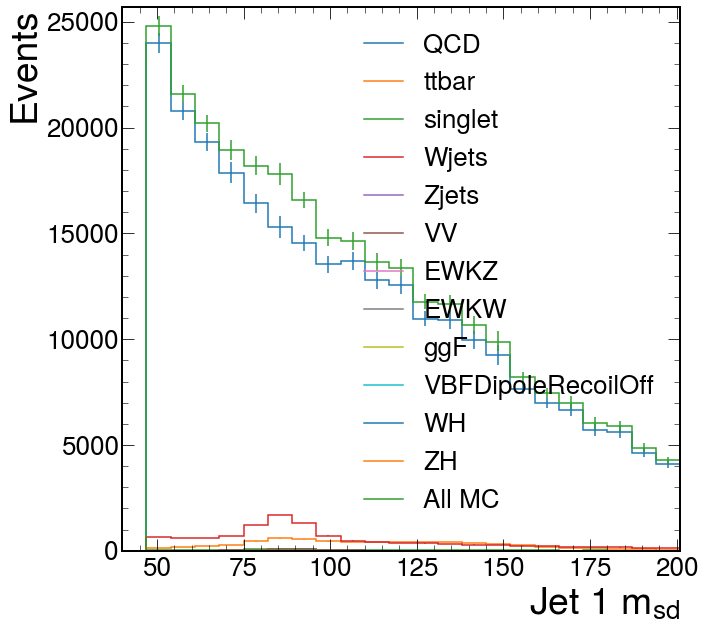

In [132]:
for proc in mc: 
    hist.plot1d(cutflow_sum.integrate('process', proc))

hist.plot1d(cutflow_sum.integrate('process', mc, overflow='all'))
plt.legend(mc+['All MC'])

In [141]:
def plot_sample_ddb_ddc_pass(cutflow):
    
    cutflow_sum = cutflow.sum(*['genflavor1', 'genflavor2', 'msd2','j2pt'], overflow='all').integrate('ddb1', slice(0.87,1)).integrate('ddc2',slice(0.02,1))
    
    proc_list =  ['ZH','WH', 'QCD', 'ttbar']
    for proc in proc_list: 
        hist.plot1d(cutflow_sum.integrate('process', proc))
    
    #hist.plot1d(cutflow_sum.integrate('process', mc, overflow='all'))
    #plt.legend(mc+['All MC'])
    
    plt.legend(proc_list)
    plt.show()

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWa

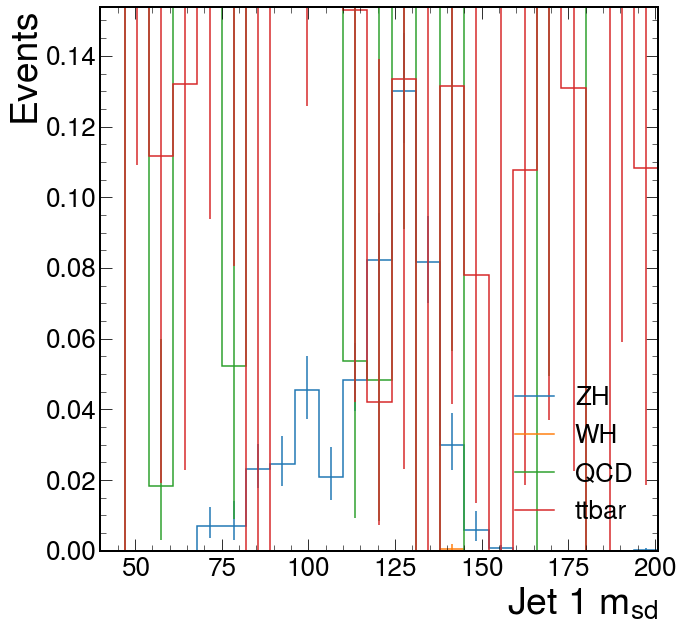

In [142]:
plot_sample_ddb_ddc_pass(cutflow_0)